# 实例：泰坦尼克号幸存者的预测
今天我们通过分类树模型来预测一下哪些人可能成为幸存者。

# 1. 导入所需要的库

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 2. 导入数据集

In [2]:
data = pd.read_csv(r"E:\9-Python\study\notes\Deep-Learning-Essay\3. sklearn\CaiCai-Sklearn-Lesson\train.csv",index_col
= 0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. 对数据集进行预处理

In [5]:
#删除缺失值过多的列，和观察判断来说和预测的y没有关系的列
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

#处理缺失值，对缺失值较多的列进行填补，有一些特征只确实一两个值，可以采取直接删除记录的方法
data["Age"] = data["Age"].fillna(data["Age"].mean())
data = data.dropna()

#将分类变量转换为数值型变量
#将二分类变量转换为数值型变量
#astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，astype可以将文本类转换为数字，用这
#个方式可以很便捷地将二分类特征转换为0~1
data["Sex"] = (data["Sex"]== "male").astype("int")

#将三分类变量转换为数值型变量
#unique()取出所有的值然后压缩，重复值都删掉，
labels = data["Embarked"].unique().tolist()
# apply在这一列上执行这个操作
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

#查看处理后的数据集
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


# 4. 提取标签和特征矩阵，分测试集和训练集

In [6]:
# iloc从所有标签中取出 y = survived
X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]

from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

#修正测试集和训练集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    
#查看分好的训练集和测试集
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,35.000000,0,0,512.3292,1
1,3,1,29.699118,1,0,24.1500,2
2,3,1,35.000000,0,0,7.1250,0
3,3,1,7.000000,4,1,39.6875,0
4,2,1,23.000000,2,1,11.5000,0


# 5. 导入模型，粗略跑一下查看结果

In [10]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.7640449438202247

In [11]:
clf = DecisionTreeClassifier(random_state=25)
score = cross_val_score(clf,X,y,cv=10).mean()
score

0.7739274770173645

# 6. 在不同max_depth下观察模型的拟合状况

0.8177860061287026


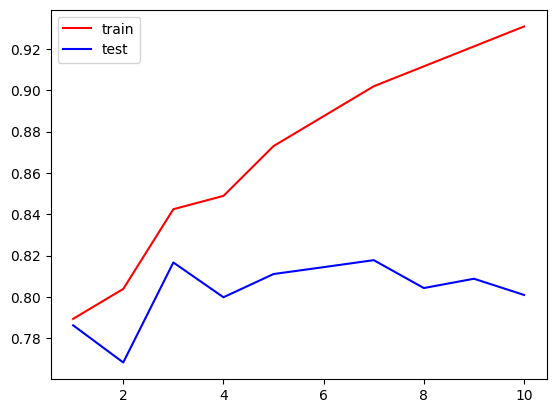

In [15]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                               )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.legend()
plt.show()

# 7. 网格搜索调整参数
能够帮助我们同时调整多个参数的技术，枚举技术

In [16]:
import numpy as np
# 按间隔均匀地返回数字空间，生成随机的，所以不用arange
gini_thresholds = np.linspace(0,0.5,20)
# 一串参数和这些参数对应的，我们希望网格搜索来搜索的参数的取值范围

parameters = {'splitter':('best','random')
             ,'criterion':("gini","entropy")
             ,"max_depth":[*range(1,10)]
             ,'min_samples_leaf':[*range(1,50,5)]
              # 信息增益
             ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }
clf = DecisionTreeClassifier(random_state=25)
# 导入模型，告诉它一个参数列表，交叉验证次数
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)
# GS.best_params_
# GS.best_score_

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=25),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0, 0.02631578947368421,
                                                   0.05263157894736842,
                                                   0.07894736842105263,
                                                   0.10526315789473684,
                                                   0.13157894736842105,
                                                   0.15789473684210525,
                                                   0.18421052631578946,
                                                   0.21052631578947367,
                                                   0.23684210526315788,
                                                   0.2631578947368421,
                                                   0.2894736842105263,
                                                   0.3157894736842105,
                                                   0.3421052631578947,
                                                   0.3684210526315789,
                                                   0.39473684210526316,
                                                   0.42105263157894735,
                                                   0.4473684210526315,
                                                   0.47368421052631576, 0.5],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46],
                         'splitter': ('best', 'random')})

In [17]:
GS.best_params_ #从我们输入的参数和参数取值的列表中，返回最佳组合
GS.best_score_ #网格搜索后的模型的评判标准

0.8343317972350232